In [1]:
import nsaba.nsaba as na
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_approximation import RBFSampler
import numpy as np
import time

import matplotlib as mt
import matplotlib.pyplot as plt
mt.style.use('ggplot')
%matplotlib inline

In [2]:
dd = '../../data_dir'
na.Nsaba.aba_load(dd)
na.Nsaba.ns_load(dd)

This may take a minute or two ...
SampleAnnot.csv loaded.
MicroarrayExpression.csv loaded.
Probes.csv loaded.
Nsaba.aba['mni_coords'] initialized.

This may take a minute or two ...
database.txt loaded.
features.txt loaded.
Nsaba.ns['mni_coords'] initialized.



In [3]:
na.Nsaba.ns_load_id_dict()

This may take a minute or two ...


In [4]:
para = na.Nsaba()

In [5]:
_, df = para._term_to_coords('reward', -1)

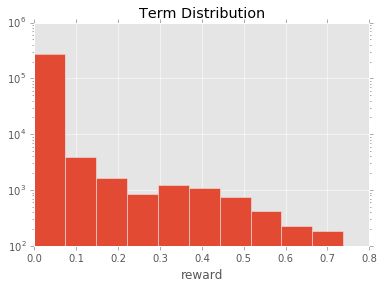

In [6]:
df.reward.hist(bins=10);
plt.title("Term Distribution");
plt.yscale('log')
plt.xlabel('reward');

In [7]:
X = df.loc[:, 'x':'z'].as_matrix()
y = df.loc[:, 'reward'].as_matrix()

In [8]:
rbf_transformer = RBFSampler(gamma=1, random_state=1)
rbf = lambda x: rbf_transformer.fit_transform(x)
X_rbf = rbf(X)

In [9]:
clf = SGDRegressor()
clf.fit(X_rbf,y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [22]:
coord = (52,-4,-2)
print coord
print "SGD (RBF) Classifer: %f" % clf.predict(rbf([coord]))
if para.coord_to_ns_act(coord) is not []:
    print "Data Mean: %f" % para.coord_to_ns_act(coord, 'dict')['reward']

(52, -4, -2)
SGD (RBF) Classifer: 0.010313
Data Mean: 0.737604


In [23]:
para.term_to_coords('reward', 1)

[PMID_coord_pair(pmid=23904492, coords=[(52.0, -4.0, -2.0), (-56.0, -6.0, 0.0), (10.0, 6.0, -6.0), (-10.0, 8.0, -6.0), (14.0, -4.0, -8.0), (-18.0, -4.0, -8.0), (28.0, 20.0, -14.0), (-30.0, 20.0, -12.0), (2.0, 40.0, 10.0), (6.0, -2.0, 28.0), (-2.0, -22.0, -16.0), (22.0, -30.0, -2.0), (-22.0, -30.0, -4.0), (32.0, -88.0, -2.0), (-34.0, -72.0, -4.0), (32.0, -92.0, 0.0), (52.0, -74.0, 16.0), (-32.0, -92.0, 4.0), (-42.0, -70.0, 10.0), (34.0, -62.0, -10.0), (-34.0, -66.0, -8.0), (16.0, -90.0, 16.0), (-14.0, -92.0, 16.0), (10.0, -76.0, -6.0), (-10.0, -74.0, -6.0), (-56.0, -10.0, -4.0), (58.0, 2.0, -12.0), (-12.0, 62.0, 20.0), (36.0, -12.0, 24.0), (30.0, 22.0, -6.0), (-44.0, -72.0, 32.0), (50.0, -72.0, 30.0), (-6.0, -54.0, 18.0)])]

In [27]:
np.squeeze(para.coords_to_ns_act([coord, (0,0,0)], 'reward'))

array([ 0.07308741,  0.        ])